In [ ]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

# Exercises - Pandas

In [ ]:
import pandas as pd
import numpy as np
from utils import Datasets

## Exercise 1

Create a dataframe that looks like the one below:

![pd_example](https://www.dropbox.com/s/kfe59p3fqlgdwuu/dfexample.png?dl=1)

**Answer the following questions using python**

- rename columns to only contain lower case letters ("age", "weight", "gender")

- create a new dataframe only holding observations with weight more than 60

- create a new dataframe only holding observations with females and columns of age and weight

- create a new dataframe with males above age 45

### Solution 1

In [33]:
data = {"Age":(43,37,23,78,12,57), 
        "Weight":(89,57,67,102,40,73), 
        "Gender": ("male","male", "female","male","female","female")}
df = pd.DataFrame(data)
df

,Age,Weight,Gender
0,43,89,male
1,37,57,male
2,23,67,female
3,78,102,male
4,12,40,female
5,57,73,female


In [34]:
df.columns = ["age", "weight","gender"]
df

,age,weight,gender
0,43,89,male
1,37,57,male
2,23,67,female
3,78,102,male
4,12,40,female
5,57,73,female


In [14]:
# weight > 60
df.loc[df["weight"]>60,:] # or df[df["weight"]>60] 

,age,weight,gender
0,43,89,male
2,23,67,female
3,78,102,male
5,57,73,female


In [16]:
# only females
df.loc[df["gender"]=="female", ["age", "weight"]]

,age,weight
2,23,67
4,12,40
5,57,73


In [18]:
df.loc[(df["gender"]=="male") &(df["age"]> 45), :]

,age,weight,gender
3,78,102,male


## Excercise 2

Given the above dataframe:

- calculate the mean age for females

- calculate the youngest age of males 

- calculate the mean weight of people older than 40 years

- transform age and weight such that it has a mean of 0 and a standard deviation of 1


### Solution 2

In [36]:
# Calculate mean age of females
df.loc[df["gender"]=="female", "age"].mean()

30.666666666666668

In [37]:
np.mean(df.loc[df["gender"]=="female", "age"])

30.666666666666668

In [41]:
msk = df["gender"]=="female"
df.loc[msk,"age"].mean()

30.666666666666668

In [43]:
# calculate minium age of males
df.loc[df["gender"]=="male", "age"].min()

37

In [44]:
# Calculate the mean weight of people older than 40 years

In [45]:
df.loc[df["age"]> 40,"weight"].mean()

88.0

In [52]:
df_new = df[["age","weight"]]
df_new

,age,weight
0,43,89
1,37,57
2,23,67
3,78,102
4,12,40
5,57,73


In [54]:
df_new_zscore = (df_new - df_new.mean())/df_new.std()

In [58]:
df_new_zscore.mean(), df_new_zscore.std()

(age       7.401487e-17
 weight    2.174187e-16
 dtype: float64,
 age       1.0
 weight    1.0
 dtype: float64)

## Exercise 3

Load the daily dax dataset and do the following:

1. use  only variables "low", "high", "close"

2. calculate daily return for all three variables (use function shift() is easiest)

3. delete rows where all three variables have nans 

4. check if any nans still in dataframe; if so: replace remaining nans with median return for that variable

4. calculate mean, median, min, max and std of returns for all variables

5. plot boxplot of all three variables (hint: use "box")

6. ADVANCED: calculate the average return (based on daily returns) for month of year (i.e. Jan to Dec) and plot the outcome as a barchart (tipp: use pd.to_datetime to convert to date objects) 

In [18]:
df = Datasets.dax_daily(dtype="pandas")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0.0
1987-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0.0
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0.0


### Solution 3

In [19]:
# 1 und 2
df = df[["Low", "High", "Close"]]
ret = df.shift(-1) / df - 1
ret.shape

(8449, 3)

In [6]:
# 3: delete all nans
ret = ret.dropna(thresh=1, axis=0)
ret.shape

(8160, 3)

In [7]:
# 4: check if still nans
ret.isnull().sum()

Low      0
High     0
Close    0
dtype: int64

In [7]:
# 5: calculate mean, median, ...

In [8]:
ret.describe()

,Low,High,Close
count,8160.000000,8160.000000,8160.000000
mean,0.000383,0.000321,0.000367
std,0.013806,0.012268,0.014055
min,-0.131434,-0.131434,-0.131434
25%,-0.006308,-0.005350,-0.006385
50%,0.001024,0.000649,0.000753
75%,0.007333,0.006513,0.007468
max,0.109420,0.087768,0.114020


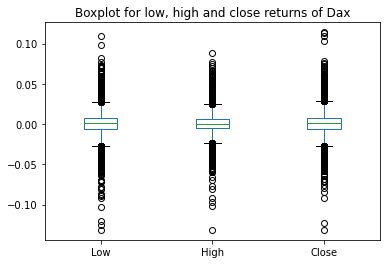

In [16]:
# 6. Boxplot
ret.plot(kind="box", title="Boxplot for low, high and close returns of Dax")

In [23]:
# 7. ADVANCED: 
# a. convert to datetime object
ret.index = pd.to_datetime(ret.index) # convert index to datetime object

We can now work with datetime functionality

In [37]:
ret.loc[ret.index.year>2018, "Close"]

Date
2019-01-02   -0.015456
2019-01-03    0.033699
2019-01-04   -0.001846
2019-01-07    0.005226
2019-01-08    0.008269
                ...   
2020-10-07    0.008790
2020-10-08    0.000692
2020-10-09    0.006680
2020-10-12   -0.009089
2020-10-13         NaN
Name: Close, Length: 451, dtype: float64

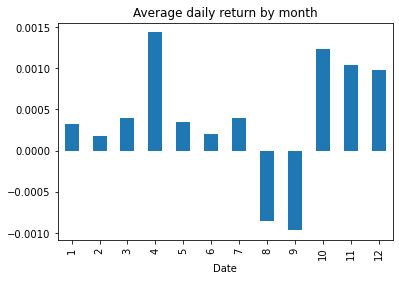

In [38]:
# b. calculate average return per month of year
ret.groupby(ret.index.month)["Close"].mean().plot(kind="bar", title="Average daily return by month")